In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()

In [3]:

def readAtomicTimes(file_path):
    names=['name', 'blocks','threads','iterations','size','validated','time']
    df = pd.read_csv(file_path, names=names)
    df['name'] = (df['name'].str
                             .replace('add_as_accumuluated_requests', 'aggregated')
                            .replace('add_as_requests', 'requests')
                            .replace('add_trival', 'trivial'))
    df['total_threads'] = df['threads'] * df['blocks']
    df['throughput'] = df['iterations'] * df['total_threads'] / df['time']
    return df

def plotAtomics(df, x):
    palette=['#D98880', '#58D68D', '#A569BD', '#A93226', '#28B463', '#6C3483']
    plot = sns.lineplot(data=df, x=x, y='throughput', palette=palette, marker="o",
                        hue=df[['name', 'size']].apply(lambda x: (x['name'] + '-' + str(x['size'])), axis=1))
    plot.set_xscale('log', base=2)
    
    plot.set(yscale='log')
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    
def plotQueues(df, x):
    plot = sns.lineplot(data=df, x=x, y='throughput', marker="o",hue='name')
    plot.set_xscale('log', base=2)
    
    plot.set(yscale='log')
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))


def readQueuTimes(file_path):
    names=['platform', 'name','threads','blocks','iterations','time']
    df = pd.read_csv(file_path, names=names)
    df['total_threads'] = df['threads'] * df['blocks']
    df['throughput'] = df['iterations'] * df['total_threads'] / df['time']
    return df



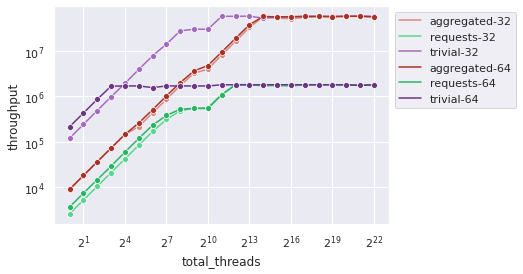

In [4]:
atomicadd1 = readAtomicTimes("../results/atomicadd_singleblock.txt")
atomicadd2 = readAtomicTimes("../results/atomicadd.txt")
atomicadd2 = atomicadd2[(atomicadd2["threads"]==1024)]
atomicadd = atomicadd1.append(atomicadd2, ignore_index=True)
plotAtomics(atomicadd, x='total_threads')

In [7]:
#
# more_block =atomicadd[(atomicadd["threads"]==512)]
# plotAtomics(more_block, x='blocks')

In [8]:
# more_block =atomicadd[(atomicadd["threads"]==256)]
# plotAtomics(more_block, x='blocks')

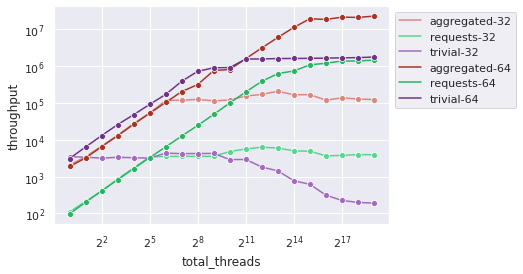

In [9]:
atomiccas_oneblock = readAtomicTimes("../results/atomiccas_singleblock.txt")
atomiccas = readAtomicTimes("../results/atomiccas.txt")
atomiccas = atomiccas_oneblock.append(atomiccas, ignore_index=True)
plotAtomics(atomiccas, x='total_threads')

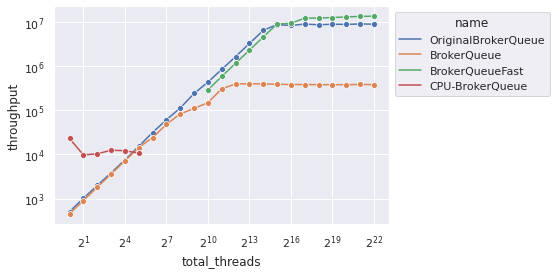

In [11]:
queue_times = readQueuTimes("../results/queues.txt")
cpu_queue_times = readQueuTimes("../results/cpu_queues.txt")
cpu_queue_times['name'] = (cpu_queue_times['name'].str
                             .replace('BrokerQueue', 'CPU-BrokerQueue'))

queue_times = queue_times.append(cpu_queue_times, ignore_index=True)
plotQueues(queue_times, 'total_threads')